### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('coupons.csv')

# DataFrame Shape
The data frame in consideration has 12684 rows and 26 columns based on the initial observations from the shape method

In [4]:
data.head(5)
#print(data['coupon'].unique())
data.shape
# The data frame in consideration has 12684 rows and 26 columns

(12684, 26)

# Describe DataFrame
Leveraging the describe method one can get the mean, standard deviations, count for different numerical columns that comprise the data set. 
Most of the numerical columns are logical booleans which could well have been True or False values. E.g: has_children

In [6]:
data.describe([0.1,0.25,0.5,0.75,0.8,0.90,0.95])

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
10%,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
80%,80.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000
90%,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


# DataFrame Information
By running the info() method one can infer that there are ton of notional string and numerical values which have been represented as objects. e.g.: Destination, passangar and weather all could be string columns.
In a similar vein 'Income' could be a float value

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

# Null Check
Observed that the column 'car' has 12576 null values , where as columns Bar, CoffeeHouse, CarryAway, rRestaurantLessThan20, 20to50 have a null values for around 100-150 columns. The car column is not very useful as majority of the rows have this column value as NULL

In [8]:
#Describe the numerical attributes in the dataset
#Check for Null Values in the field
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

# Drop Redundant Column(s)
Drop columns like 'car' which has majority null rows and is not very useful as it stands

In [9]:
#data['Bar'].value_counts()
data_cleansed=data.drop(columns=['car'])
data_cleansed.isna().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

# Replace with most frequent value
For the rest of the columns which have  few null values, fill the null columns with the most frequently occuring value for that column using value_count() and idxmax() functions in conjunction. Validate that the isna().sum() returns 0 for all the columns after this exercise

In [11]:
mostProbableCoffeHouseVals=data_cleansed['CoffeeHouse'].value_counts().idxmax()
#print(uniqueCoffeHouseVals)
data_cleansed['CoffeeHouse']=data_cleansed['CoffeeHouse'].fillna(mostProbableCoffeHouseVals)
mostProabableBarVals=data_cleansed['Bar'].value_counts().idxmax()
print(mostProabableBarVals)
data_cleansed['Bar']=data_cleansed['Bar'].fillna(mostProabableBarVals)
mostProbablerestaurantLT20=data_cleansed['RestaurantLessThan20'].value_counts().idxmax()
print(mostProbablerestaurantLT20)
data_cleansed['RestaurantLessThan20']=data_cleansed['RestaurantLessThan20'].fillna(mostProbablerestaurantLT20)
mostProabableCarryAway=data_cleansed['CarryAway'].value_counts().idxmax()
print(mostProabableCarryAway)
data_cleansed['CarryAway']=data_cleansed['CarryAway'].fillna(mostProabableCarryAway)
print("Value Count")
print(type(data_cleansed['Restaurant20To50'].value_counts().idxmax()))
data_cleansed['Restaurant20To50']=data_cleansed['Restaurant20To50'].value_counts().idxmax()
data_cleansed.isna().sum()


never
1~3
1~3
Value Count
<class 'str'>


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

# Unify Unit Of Measure for the column expiration
The unit of measure mentioned for expiration has different Unit of Measure like 'd'( day) and 'h'( hour) . leveraging the knowledge we are better of converting the same to one common Unit of Measure

In [12]:
# shows unique values of 1d and 2h. Converting the 1d to 24 hours 
#data_cleansed['expiration'].unique()
# Convert to a common UOM hours using the function . 1 day =24 hours
def convertToCommonUOM(expiration):
    if ("d" in expiration):
        val=float(expiration.replace("d",""))*24
        return val
    elif ("h" in expiration):
        val=float(expiration.replace("h",""))
        return val
# Convert object to string and leverage apply method to invoke the function defined above. Add a new column to the cleansed data set
data_cleansed['expiration_common_uom']= data_cleansed['expiration'].astype(str).apply(convertToCommonUOM)
print( data_cleansed['expiration_common_uom'])

0        24.0
1         2.0
2         2.0
3         2.0
4        24.0
         ... 
12679    24.0
12680    24.0
12681    24.0
12682    24.0
12683     2.0
Name: expiration_common_uom, Length: 12684, dtype: float64


4. What proportion of the total observations chose to accept the coupon?



In [13]:
percentAcceptedCoupons=data_cleansed.query('Y==1')["Y"].count()/data_cleansed["Y"].count()
print("Accepted Coupon ratio is {}".format(percentAcceptedCoupons))
print("Accepted Coupon Percentage is {}".format(percentAcceptedCoupons*100))

Accepted Coupon ratio is 0.5684326710816777
Accepted Coupon Percentage is 56.84326710816777


Around 56.84% of the coupons were accepted out of the total observation set shared

5. Use a bar plot to visualize the `coupon` column.

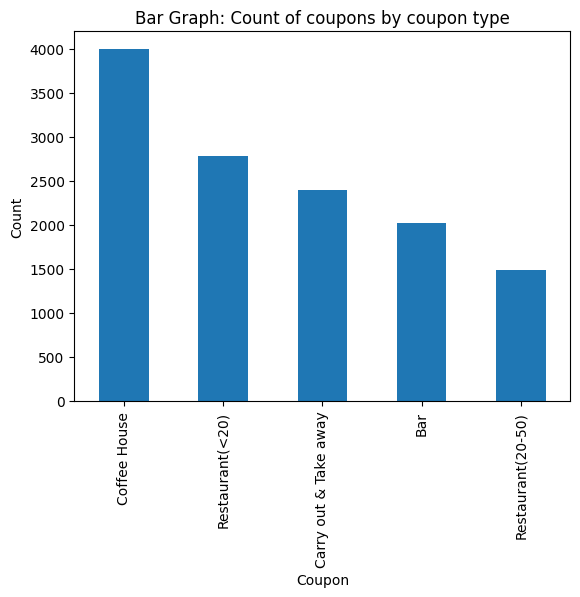

<Figure size 640x480 with 0 Axes>

In [46]:
#sns.countplot(data=data_cleansed,x="coupon")
# Get the count of coupons by coupon type using value_count() function. This will give a series of counts grouped by column 'coupon'
data_count_by_coupon=data_cleansed["coupon"].value_counts()
#type(data_count_by_coupon)
#Use the plot() method to plot the series by mentioning kind="bar"
data_count_by_coupon.plot(kind="bar")
plt.xlabel("Coupon")
plt.ylabel("Count")
plt.title("Bar Graph: Count of coupons by coupon type")
plt.show()
plt.savefig("images/barchartByCoupon")



The coffee house coupon appears the most in the observation and the high end restaurants appears the least.

6. Use a histogram to visualize the temperature column.

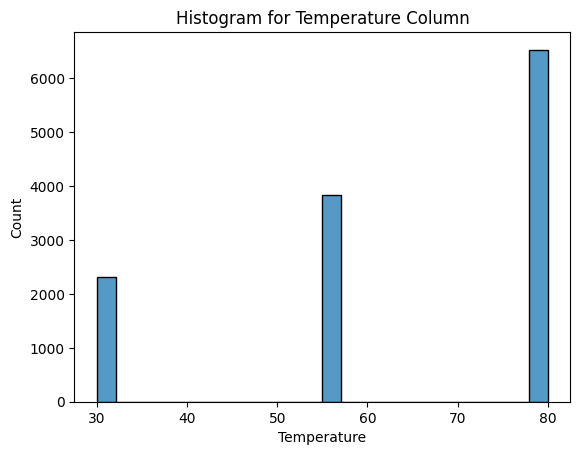

<Figure size 640x480 with 0 Axes>

In [47]:
sns.histplot(data=data_cleansed,x="temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title("Histogram for Temperature Column")
plt.show()
plt.savefig("images/histogramTemparatureColumn")

# Verify what I see in a histogram
#data_cleansed["temperature"].value_counts()

There are just 3 values for temperature in the observation data set and is not following a normal distribution

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [16]:
data_cleansed_bar_only=data_cleansed.query('coupon=="Bar"')
#print(data_cleansed_bar_only.shape)

There are 2017 observations where coupon for Bar has been offered

2. What proportion of bar coupons were accepted?


In [17]:
accepted_bar_coupon_percent=data_cleansed_bar_only.query("Y==1")["Y"].count()/data_cleansed_bar_only["Y"].count()
print(accepted_bar_coupon_percent)

0.41001487357461575


~ 41% of the bar coupons are accepted 

In [18]:
# Repeated this so many times , thought I will reuse  this via a function
def determineAcceptanceRatio(inputdf):
    #print (type(inputdf))
    #print(inputdf.columns)
    val=inputdf.query("Y==1")["Y"].shape[0]/inputdf["Y"].shape[0]
    return val
   
    


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
#data_cleansed_bar_only['Bar'].value_counts()
# Please note that I replaced 107 null values for the Bar Column with the most frequently repeated value from the original dataframe
#  Values to be considered modelled in a list
values_less_thaneq3=["never","less1","1~3"]
values_greater_than3=["4~8","gt8"]
#Filter relevant data using the isin clause againt the lists defined above
data_cleansed_rare_bar_vistor=data_cleansed_bar_only[data_cleansed_bar_only['Bar'].isin(values_less_thaneq3)]
data_cleansed_freq_bar_vistor=data_cleansed_bar_only[data_cleansed_bar_only['Bar'].isin(values_greater_than3)]
# Invoke the function to get the acceptance rate for the bar coupons meeting the criteria
acceptance_rate_normal=determineAcceptanceRatio(data_cleansed_rare_bar_vistor)
acceptance_rate_frequent=determineAcceptanceRatio(data_cleansed_freq_bar_vistor)
print(acceptance_rate_normal)
print(acceptance_rate_frequent)




0.37073707370737075
0.7688442211055276


The acceptance ratio for bar coupons by those who frequented bar more than 3 times a month is ~double the number of acceptances 
from those who did not frequent the bar as much

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [20]:
# Model lists for values to be included or excluded
bar_freq_filter=["1~3","4~8","gt8"]
age_filter=["21","below21"]
# ~ for simulating the NOT operation. Model conditions 
age_condition=~(data_cleansed_bar_only['age'].isin(age_filter))
bar_freq_condition=(data_cleansed_bar_only['Bar'].isin(bar_freq_filter))
# Apply conditions on the data frame
data_bar_age25plus_freq=data_cleansed_bar_only[ age_condition & bar_freq_condition]
# Invoke function to determine the acceptance ratio
filter_criteria_ratio=determineAcceptanceRatio(data_bar_age25plus_freq)
print(filter_criteria_ratio)
rest_of_the_rows=data_cleansed_bar_only[~(age_condition & bar_freq_condition)]
rest_of_the_rows_ratio=determineAcceptanceRatio(rest_of_the_rows)
print(rest_of_the_rows_ratio)





0.6952380952380952
0.33500313087038197


The number of drivers who are over 25 and frequent the bar over once a month are ~ twice as likely to accept a bar coupon , with respect to the
rest of the cohort who have been offered bar coupon

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [38]:
# comments are in similar vein as above. Lists, Conditions, Apply Condition to Dataframe and calculate acceptance via function
#occupation_list=["farming","fishing","forestry"]
occupation_list=["Farming Fishing & Forestry"]
bar_freq_filter=["1~3","4~8","gt8"]
passangar_condition=~(data_cleansed_bar_only['passanger']=="Kid(s)")
occupation_condition=~(data_cleansed_bar_only['occupation'].isin(occupation_list))
bar_freq_condition=(data_cleansed_bar_only['Bar'].isin(bar_freq_filter))
data_cleanse_barfreq_occupation_psnger_filter= data_cleansed_bar_only[ passangar_condition & occupation_condition & bar_freq_condition]
print(determineAcceptanceRatio(data_cleanse_barfreq_occupation_psnger_filter))
rest_of_the_rows_filter1=data_cleansed_bar_only[~(passangar_condition & occupation_condition & bar_freq_condition)]
rest_of_the_rows_ratio=determineAcceptanceRatio(rest_of_the_rows_filter1)
print(rest_of_the_rows_ratio)


0.7132486388384754
0.296043656207367


Over 70% of the cohort who frequent bars more than once a month, travelling without kids and having an occupation that is not farming, fishing or forestry accept a Bar Coupon when they are offered the same . This is much higher than the rest of the cohorts  who have around 29% acceptance

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [22]:
# Model conditions mentioned above in variables
passangar_condition=~(data_cleansed_bar_only['passanger']=="Kid(s)")
bar_freq_filter=["1~3","4~8","gt8"]
age_30below=['21','26','below21']
income_less_than_50k=['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']
passangar_no_kid_condition=~(data_cleansed_bar_only['passanger']=="Kid(s)")
bar_freq_condition=(data_cleansed_bar_only['Bar'].isin(bar_freq_filter))
marital_status_notwd_condition=~(data_cleansed_bar_only['maritalStatus']=="Widowed")
age_30below_condition=(data_cleansed_bar_only['age'].isin(age_30below))
cheap_restaurant_condition=data_cleansed_bar_only['RestaurantLessThan20'].isin(["4~8","gt8"])
less_than_50k_income_condition=data_cleansed_bar_only['income'].isin(income_less_than_50k)
# Breaking Each Condition into its components for easy readability
first_super_condition=( bar_freq_condition & passangar_no_kid_condition & marital_status_notwd_condition)
second_super_condition=(bar_freq_condition & age_30below_condition)
third_super_condition=(cheap_restaurant_condition & less_than_50k_income_condition)
data_cleansed_composite_filter=data_cleansed_bar_only[(first_super_condition | second_super_condition | third_super_condition)]
#print('The ratio of acceptance with just the first condition is {}'.format(determineAcceptanceRatio(first_super_condition))
print("The ratio of acceptance with all Conditions together {}".format(determineAcceptanceRatio(data_cleansed_composite_filter)))
print("The ratio of acceptance with only first condition satisfied {}".format(determineAcceptanceRatio(data_cleansed_bar_only[first_super_condition])))
print("The ratio of acceptance with only second condition satisfied {}".format(determineAcceptanceRatio(data_cleansed_bar_only[second_super_condition])))
print("The ratio of acceptance with only third condition satisfied {}".format(determineAcceptanceRatio(data_cleansed_bar_only[third_super_condition])))



The ratio of acceptance with all Conditions together 0.5889175257731959
The ratio of acceptance with only first condition satisfied 0.7132486388384754
The ratio of acceptance with only second condition satisfied 0.7217391304347827
The ratio of acceptance with only third condition satisfied 0.45348837209302323


The 3 conditions in isolation shows that 
1. Drivers who did not drive kids around , were not widowed and visited bar more than once in a month had 71% plus acceptance rates.
2. Drivers who frequent bars more than once in a month and are under the age of 30 have 72% acceptance rates
3. Drivers who went to cheap restaurants more than 4 times a month and whose income level was below 50K had only 45% acceptance rates
4. ALl this conditions joined by an OR was 58% acceptance rates

 Younger drivers( below 30) who frequent bars more than once a month and do not drive kids have higher acceptance rates of bar coupons. People who visit cheap restaurants more than 4 times a month and who earn south of 50K did not show the same acceptance rates as the other cohorts




7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

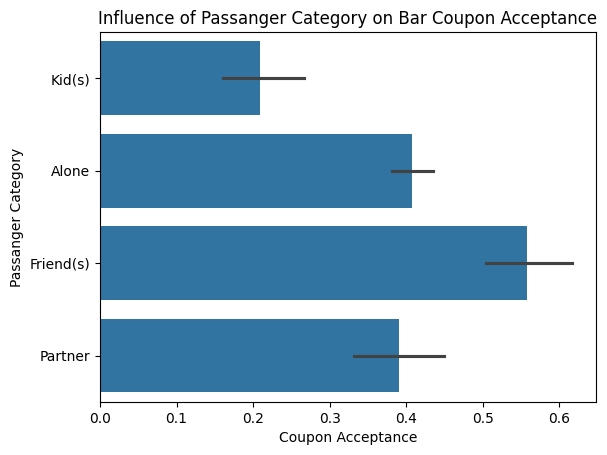

<Figure size 640x480 with 0 Axes>

In [48]:
sns.barplot(data=data_cleansed_bar_only,x="Y",y="passanger")
plt.xlabel("Coupon Acceptance")
plt.ylabel("Passanger Category")
plt.title("Influence of Passanger Category on Bar Coupon Acceptance")
plt.show()
plt.savefig("images/CouponAcceptancebyPassanger")


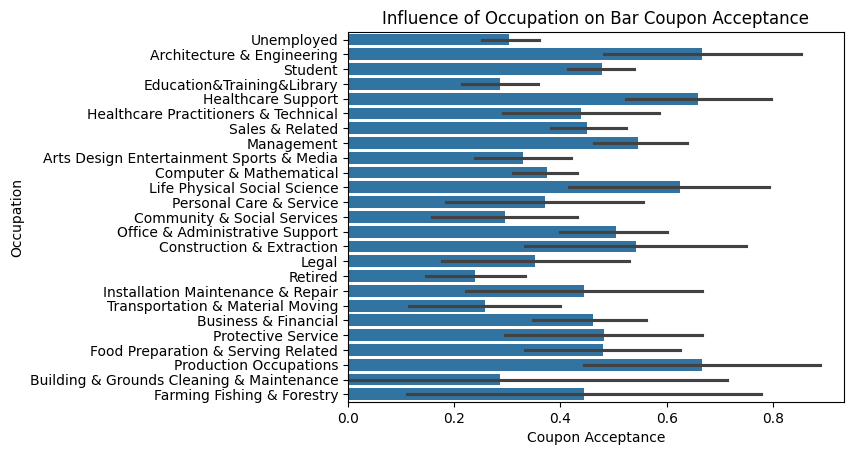

<Figure size 640x480 with 0 Axes>

In [49]:
#data_cleansed_bar_only["occupation"].value_counts()
sns.barplot(data=data_cleansed_bar_only,x="Y",y="occupation")
plt.xlabel("Coupon Acceptance")
plt.ylabel("Occupation")
plt.title("Influence of Occupation on Bar Coupon Acceptance")
plt.show()
plt.savefig("images/CouponAcceptancebyOccupation")


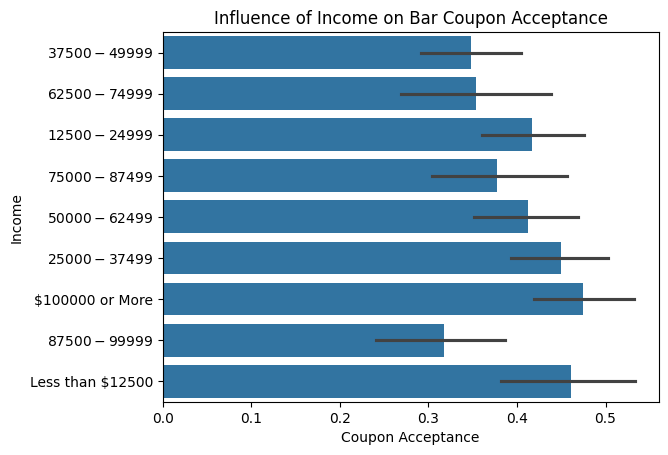

<Figure size 640x480 with 0 Axes>

In [51]:
sns.barplot(data=data_cleansed_bar_only,x="Y",y="income")
plt.xlabel("Coupon Acceptance")
plt.ylabel("Income")
plt.title("Influence of Income on Bar Coupon Acceptance")
plt.show()
plt.savefig("images/CouponAcceptancebyIncome")


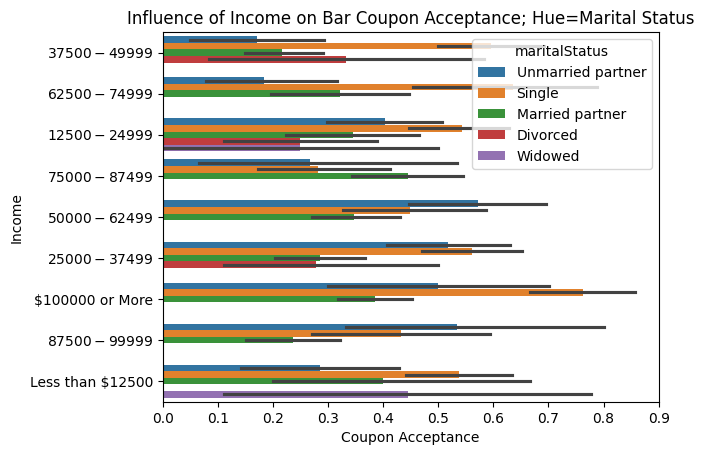

<Figure size 640x480 with 0 Axes>

In [52]:
sns.barplot(data=data_cleansed_bar_only,x="Y",y="income",hue="maritalStatus")
plt.xlabel("Coupon Acceptance")
plt.ylabel("Income")
plt.title("Influence of Income on Bar Coupon Acceptance; Hue=Marital Status")
plt.show()
plt.savefig("images/CouponAcceptancebyIncomewithHue")


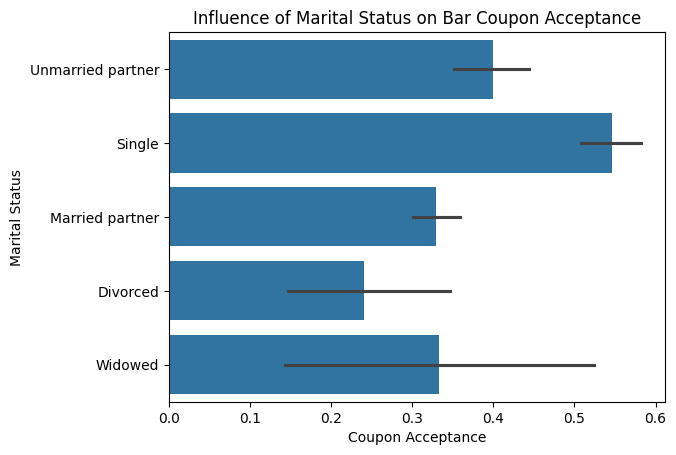

<Figure size 640x480 with 0 Axes>

In [57]:
sns.barplot(data=data_cleansed_bar_only,x="Y",y="maritalStatus")
plt.xlabel("Coupon Acceptance")
plt.ylabel("Marital Status")
plt.title("Influence of Marital Status on Bar Coupon Acceptance")
plt.show()
plt.savefig("images/CouponAcceptancebyMaritalStatus")

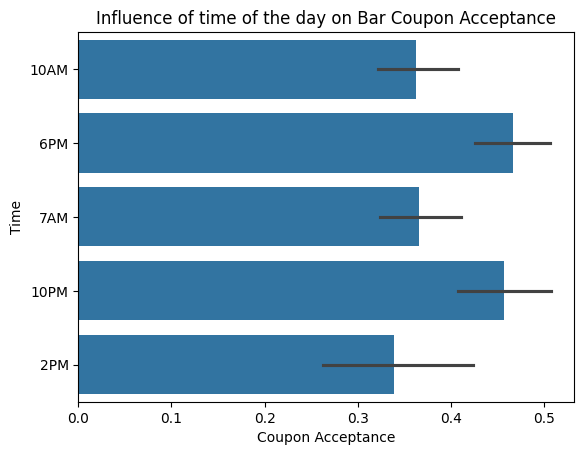

<Figure size 640x480 with 0 Axes>

In [59]:
sns.barplot(data=data_cleansed_bar_only,x="Y",y="time")
plt.xlabel("Coupon Acceptance")
plt.ylabel("Time")
plt.title("Influence of time of the day on Bar Coupon Acceptance")
plt.show()
plt.savefig("images/CouponTimeoftheDay")

### Observations from the plots and other assignment question
Drivers age, frequency of visits to the bar, the fact whether they were driving a passanger who was a kid , income level has a strong bearing on the fact if the given coupon would be accepted .
1. From the initial look people tend to accept the bar coupon when travelling with their friends and the least when they are travelling with their kids, but the black bar also denotes the variability of data in each group
2. At the occupation category, the folks in 'Education&Training&Library' and "Retired" category showed lesser affinity to actually accept the coupon
3. No striking trend wrt acceptance when looking at the influence of income in isolation
4. Rich singles with 100K plus income have a higher percentage of acceptance of bar coupons
5. Singles genrally have a higher acceptance rates for bar coupons
6. The evening and later in the night are when the bar coupons have higher acceptance rates

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  Let us dwell deeper into coupon group "CoffeeHouse" as that seems to have higher volume of data 

In [56]:
data_cleansed_coffeehouse_only=data_cleansed.query('coupon=="Coffee House"')
data_cleansed_coffeehouse_only.shape


(3996, 26)

In [58]:
data_cleansed_coffeehouse_only.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,expiration_common_uom
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,less1,1,0,0,0,1,0,2.0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,less1,1,1,0,0,1,0,2.0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,1~3,4~8,less1,1,1,0,0,1,0,24.0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,less1,1,1,0,0,1,1,2.0
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,less1,1,0,0,0,1,0,2.0
16,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,less1,1,1,1,0,1,1,2.0
21,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,21,Unmarried partner,...,1~3,4~8,less1,1,1,0,0,1,1,2.0
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,2.0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,0,24.0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,4~8,4~8,less1,1,1,0,0,1,0,2.0


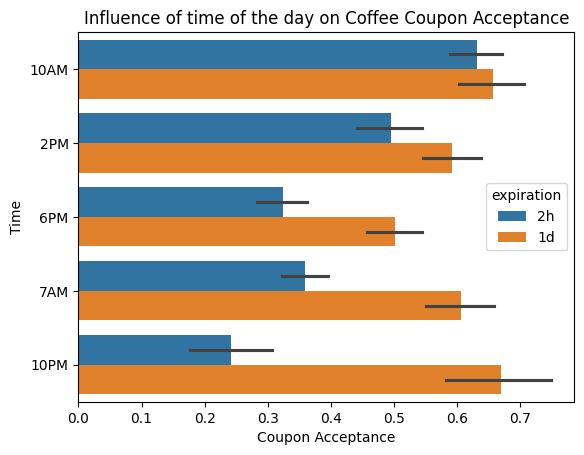

<Figure size 640x480 with 0 Axes>

In [61]:
sns.barplot(data=data_cleansed_coffeehouse_only,x="Y",y="time",hue="expiration")
plt.xlabel("Coupon Acceptance")
plt.ylabel("Time")
plt.title("Influence of time of the day on Coffee Coupon Acceptance")
plt.show()
plt.savefig("images/CouponTimeoftheDayCoffee")

1. Higher acceptance of Coffee Coupons at 10 AM timeslot, irrespective of the expiration timeframe of the coupon
2. Coupons which has an expiration lasting a day and are offered at 10 PM , have higher rate of acceptance when offered in the 10 PM slot, inspite of generally low acceptance

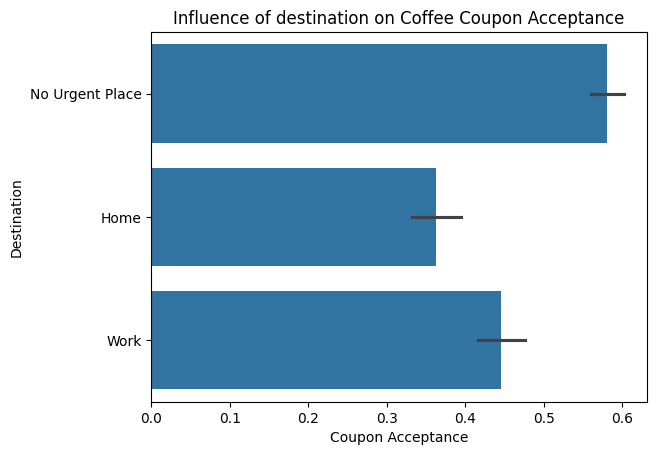

<Figure size 640x480 with 0 Axes>

In [62]:
sns.barplot(data=data_cleansed_coffeehouse_only,x="Y",y="destination")
plt.xlabel("Coupon Acceptance")
plt.ylabel("Destination")
plt.title("Influence of destination on Coffee Coupon Acceptance")
plt.show()
plt.savefig("images/CouponDestinationCoffee")

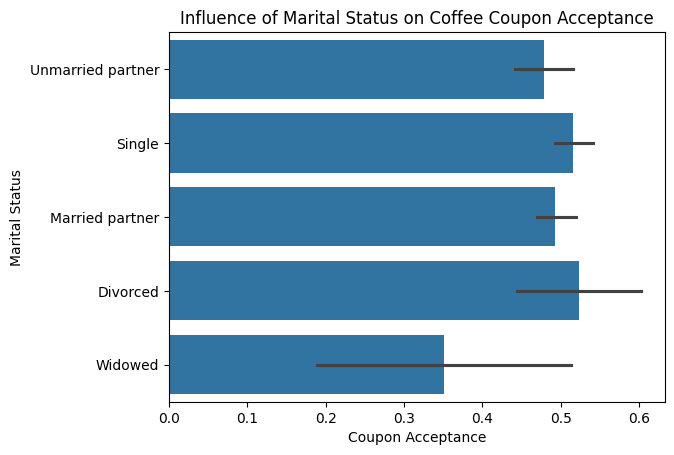

<Figure size 640x480 with 0 Axes>

In [63]:
sns.barplot(data=data_cleansed_coffeehouse_only,x="Y",y="maritalStatus")
plt.xlabel("Coupon Acceptance")
plt.ylabel("Marital Status")
plt.title("Influence of Marital Status on Coffee Coupon Acceptance")
plt.show()
plt.savefig("images/CouponMaritalStatusCoffee")

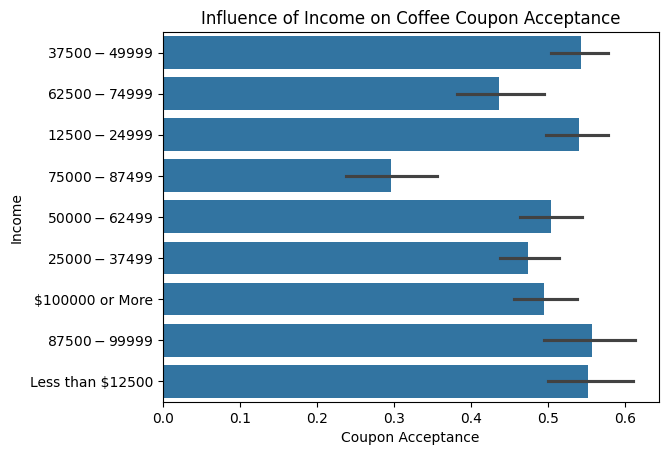

<Figure size 640x480 with 0 Axes>

In [64]:
sns.barplot(data=data_cleansed_coffeehouse_only,x="Y",y="income")
plt.xlabel("Coupon Acceptance")
plt.ylabel("Income")
plt.title("Influence of Income on Coffee Coupon Acceptance")
plt.show()
plt.savefig("images/CouponIncomeCoffee")

No catchy patterns emerge when we look at the Bar Plots for Coupon Acceptance for Coffee for columns destination, marital status and income